# Implementing MLP with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
print(f'Tensorflow: {tf.__version__}')
print(f'Keras: {keras.__version__}')

Tensorflow: 2.3.0
Keras: 2.4.0


## Retrieve Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
import matplotlib.pyplot as plt

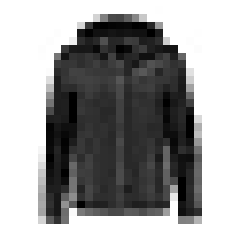

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden_1 = model.layers[1]

In [14]:
hidden_1.name

'dense'

In [32]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [15]:
model.get_layer("dense") is hidden_1

True

In [16]:
weights, biases = hidden_1.get_weights()

In [17]:
weights

array([[-0.01922728, -0.00893869,  0.02335751, ..., -0.07194149,
        -0.01083808,  0.06541045],
       [-0.07433869,  0.02654736,  0.00506944, ..., -0.07144284,
         0.01677009,  0.02502529],
       [-0.03190146,  0.05978407,  0.07357043, ...,  0.06527323,
        -0.06736727,  0.07073805],
       ...,
       [-0.05147912,  0.03637615, -0.03688622, ..., -0.02827361,
         0.05899538, -0.03691134],
       [ 0.01548495, -0.06060509, -0.01441144, ...,  0.03042267,
         0.00693183,  0.06544214],
       [ 0.04332552,  0.03204404, -0.06302477, ...,  0.02689559,
        -0.0596016 ,  0.02579103]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 881us/step - loss: 0.7086 - accuracy: 0.7692 - val_loss: 0.5670 - val_accuracy: 0.7946
Epoch 2/30
1719/1719 [==============================] - 1s 823us/step - loss: 0.4874 - accuracy: 0.8299 - val_loss: 0.4450 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 1s 824us/step - loss: 0.4434 - accuracy: 0.8440 - val_loss: 0.4371 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 1s 819us/step - loss: 0.4162 - accuracy: 0.8544 - val_loss: 0.4174 - val_accuracy: 0.8552
Epoch 5/30
1719/1719 [==============================] - 1s 823us/step - loss: 0.3963 - accuracy: 0.8602 - val_loss: 0.3968 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 1s 819us/step - loss: 0.3795 - accuracy: 0.8655 - val_loss: 0.3747 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 1s 828us/step - loss: 0.3673 - accuracy: 0.8699 - val_loss: 0.3777 -

In [23]:
import pandas as pd

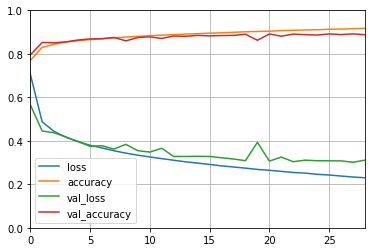

In [31]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df)
plt.grid(True)
plt.gca().set_ylim(0, 1)# set vertical range to [0-1]
plt.gca().set_xlim(0, 28)
plt.legend(history_df.keys())
plt.show()